In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
from numpy import std, mean
import scipy

anomalies = []

In [2]:
df = pd.read_csv("data.csv")
df = df.drop(columns=['viewing','duration.1'])
df.head()

,id,duration,title,channel,id.1,user-id,start,start.1,duration.2
0,_0vOaBWk64c,1828.0,MEDICAL NURSE Role Play: Binaural ASMR Sleep R...,Olivia Kissper,UCtc8gcFs2KXRzpV5iwJA8-w,1062.0,0.0,40.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,1.0


In [3]:
df.columns = ['Video ID', 'Duration', 'Title', 'Channel', 'Channel ID', 'User ID', 'Start Video', 'Start Tingle', 'Duration Tingle']

In [4]:
url = "https://youtu.be/"
def make_urls(id, time):
  df['Timestamp Link'] = f"{url}{id}?t={time}"

make_urls(df['Video ID'], df['Start Tingle'])

In [5]:
df.head()

,Video ID,Duration,Title,Channel,Channel ID,User ID,Start Video,Start Tingle,Duration Tingle,Timestamp Link
0,_0vOaBWk64c,1828.0,MEDICAL NURSE Role Play: Binaural ASMR Sleep R...,Olivia Kissper,UCtc8gcFs2KXRzpV5iwJA8-w,1062.0,0.0,40.0,1.0,https://youtu.be/0 _0vOaBWk64c\n1 ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,1.0,https://youtu.be/0 _0vOaBWk64c\n1 ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,1.0,https://youtu.be/0 _0vOaBWk64c\n1 ...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,1.0,https://youtu.be/0 _0vOaBWk64c\n1 ...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,1.0,https://youtu.be/0 _0vOaBWk64c\n1 ...


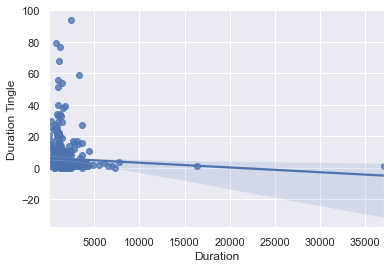

In [6]:
group_df = df.groupby('Channel')['Duration Tingle'].sum().to_frame().reset_index().sort_values(by="Duration Tingle", ascending=False)
duration_df = df.groupby('Duration')['Duration Tingle'].sum().to_frame().reset_index().sort_values(by="Duration Tingle", ascending=False)

ax = sns.regplot(x="Duration", y="Duration Tingle", data=duration_df)

Text(0.5, 1.0, 'Distribution of height')

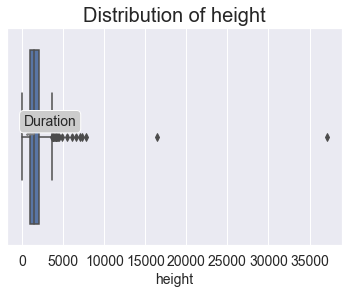

In [7]:
# box plot of the variable height
ax = sns.boxplot(duration_df.Duration)

# notation indicating an outlier
ax.annotate('Duration', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('height', fontsize=14)
plt.title('Distribution of height', fontsize=20)

In [8]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = std(random_data)
    random_data_mean = mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(duration_df['Duration'])

-4748.866356357458


[16371.0, 37102.0]

In [9]:
df_filtered = duration_df.loc[duration_df['Duration'] < 4000]
df_filtered.head()

,Duration,Duration Tingle
356,2403.0,94.0
78,723.0,79.0
164,1145.0,77.0
145,1080.0,68.0
393,3317.0,59.0


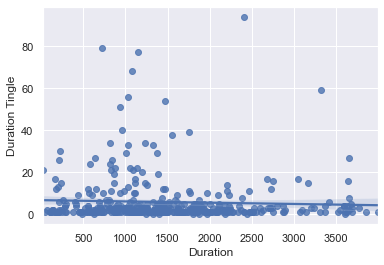

In [10]:
ax = sns.regplot(x="Duration", y="Duration Tingle", data=df_filtered)

In [11]:
group_df.head(10).reset_index(drop=True)

,Channel,Duration Tingle
0,Heather Feather ASMR,163.0
1,MassageASMR,128.0
2,Fairy Char ASMR,125.0
3,Ephemeral Rift,109.0
4,ARDRA -asmr-,89.0
5,ASMRtingle,79.0
6,ASMR Lo,78.0
7,softlygaloshes,69.0
8,Gentle Whispering ASMR,62.0
9,Smilin Observer,53.0
